# Data exporation 

in this section we will be exploring the data and preprocessing it for the model.



## imports

In [18]:
import pandas as pd
import helper
import seaborn as sns

## Raw data

In [19]:
data = pd.read_csv('../input/dataset.csv', index_col=0)
data.head()



,vote_count,vote_average,title,tagline,status,spoken_languages,duration,revenue,release,countries_of_production,production,popularity,overview,original_title,original_language,keywords,id,homepage,genres,financial_investment
0,11800,7.2,Avatar,Enter the World of Pandora.,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",162.0,2.787965e+09,2009-12-10,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",150.437577,"In the 22nd century, a paraplegic Marine is di...",Avatar,en,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",19995,http://www.avatarmovie.com/,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000.0
1,4500,6.9,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",169.0,9.610000e+08,2007-05-19,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",139.082615,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,en,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",285,http://disney.go.com/disneypictures/pirates/,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000.0
2,4466,6.3,Spectre,A Plan No One Escapes,Released,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",148.0,8.806746e+08,2015-10-26,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",107.376788,A cryptic message from Bond’s past sends him o...,Spectre,en,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",206647,http://www.sonypictures.com/movies/spectre/,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000.0
3,9106,7.6,The Dark Knight Rises,The Legend Ends,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",165.0,1.084939e+09,2012-07-16,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",112.312950,Following the death of District Attorney Harve...,The Dark Knight Rises,en,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",49026,http://www.thedarkknightrises.com/,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000.0
4,2124,6.1,John Carter,"Lost in our world, found in another.",Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",132.0,2.841391e+08,2012-03-07,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",43.926995,"John Carter is a war-weary, former military ca...",John Carter,en,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",49529,http://movies.disney.com/john-carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000.0


In [20]:
data.describe()

,vote_count,vote_average,duration,revenue,popularity,id,financial_investment
count,4803.000000,4323.000000,4801.000000,4.755000e+03,4803.000000,4803.000000,4.419000e+03
mean,690.217989,6.090354,106.875859,8.231486e+07,21.492301,57165.484281,2.898466e+07
std,1234.585891,1.193315,22.611935,1.630872e+08,31.816650,88694.614033,4.065526e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,5.000000,0.000000e+00
25%,54.000000,5.600000,94.000000,0.000000e+00,4.668070,9014.500000,7.500000e+05
50%,235.000000,6.200000,103.000000,1.918402e+07,12.921594,14629.000000,1.480000e+07
75%,737.000000,6.800000,118.000000,9.311911e+07,28.313505,58610.500000,4.000000e+07
max,13752.000000,10.000000,338.000000,2.787965e+09,875.581305,459488.000000,3.800000e+08


RMSE for 30 estimators: 1.5409048047561036


/Users/house/Desktop/machine learning/machineLearning/data_exploration/helper.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['revenue'] = raw_data['revenue'].apply(revenue_log)


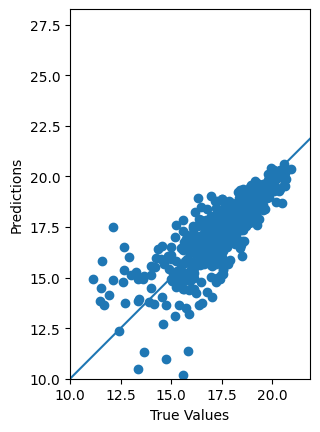

In [21]:
raw_data = data.copy()
cols_with_text = raw_data.select_dtypes(include=['object']).columns
raw_data = raw_data.drop(columns=cols_with_text)
raw_data.dropna(inplace=True)
helper.test_data_set(raw_data)


## drop non relevent columns / entries

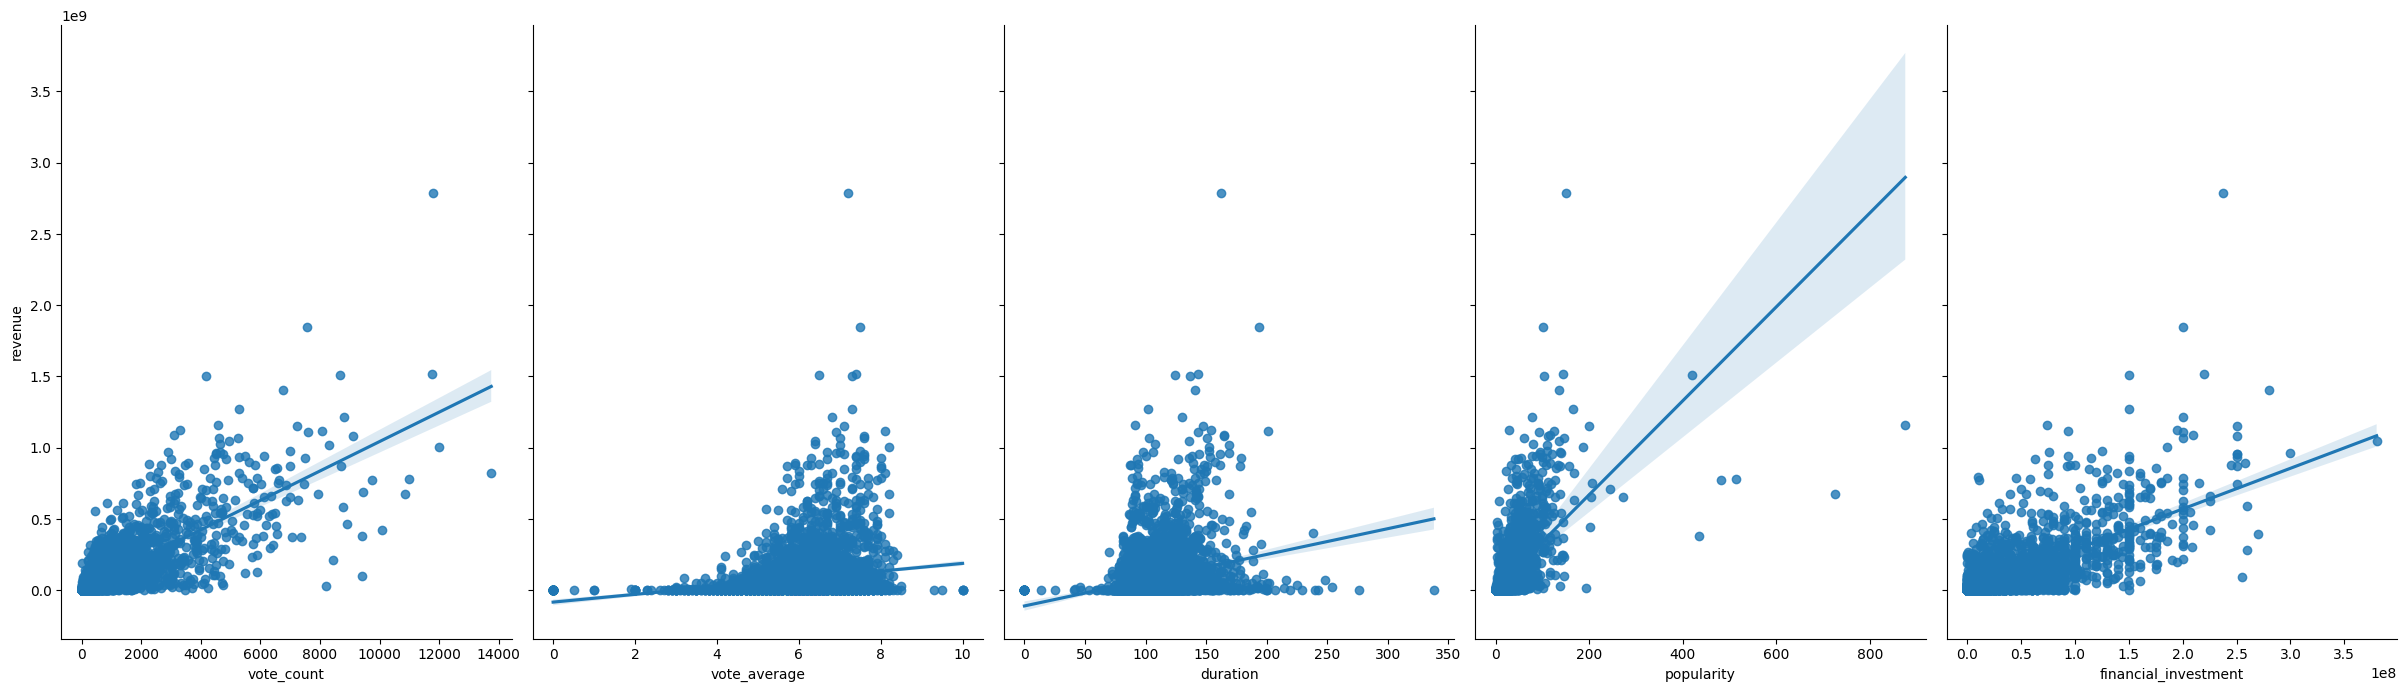

In [22]:
sns.pairplot(data, x_vars=['vote_count', 'vote_average', 'duration', 'popularity','financial_investment'], y_vars='revenue', height=7, aspect=0.7, kind='reg')
raw_data.columns
columns_to_drop = ['duration','id']
raw_data.drop(columns=columns_to_drop, inplace=True)


RMSE for 30 estimators: 1.6204457408817399


/Users/house/Desktop/machine learning/machineLearning/data_exploration/helper.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['revenue'] = raw_data['revenue'].apply(revenue_log)


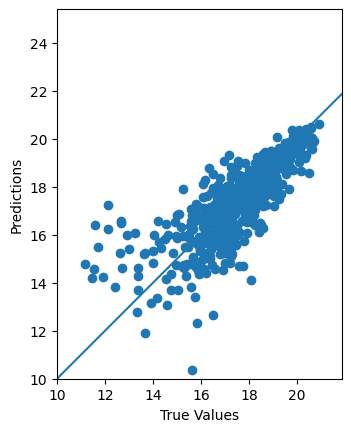

In [23]:
helper.test_data_set(raw_data)

In [24]:
drop_list = ["title", "tagline", "production","overview","original_title","homepage","id","duration"]


data = data.dropna(subset=['revenue'])
data = data[data['revenue'] != 0]
data = data.drop(drop_list, axis=1)
data.head()

,vote_count,vote_average,status,spoken_languages,revenue,release,countries_of_production,popularity,original_language,keywords,genres,financial_investment
0,11800,7.2,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",2.787965e+09,2009-12-10,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",150.437577,en,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000.0
1,4500,6.9,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",9.610000e+08,2007-05-19,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",139.082615,en,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000.0
2,4466,6.3,Released,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",8.806746e+08,2015-10-26,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",107.376788,en,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000.0
3,9106,7.6,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1.084939e+09,2012-07-16,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",112.312950,en,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000.0
4,2124,6.1,Released,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",2.841391e+08,2012-03-07,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",43.926995,en,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000.0


## extracting json data




In [25]:
data["spoken_languages"] = data["spoken_languages"].apply(helper.extract_iso_values_to_string, key="iso_639_1")
data["countries_of_production"] = data["countries_of_production"].apply(helper.extract_iso_values_to_string, key="iso_3166_1")
data["keywords"] = data["keywords"].apply(helper.extract_iso_values_to_string, key="name")
data["genres"] = data["genres"].apply(helper.extract_iso_values_to_string, key="name")

data.head()



,vote_count,vote_average,status,spoken_languages,revenue,release,countries_of_production,popularity,original_language,keywords,genres,financial_investment
0,11800,7.2,Released,"en,es",2.787965e+09,2009-12-10,"US,GB",150.437577,en,"culture clash,future,space war,space colony,so...","Action,Adventure,Fantasy,Science Fiction",237000000.0
1,4500,6.9,Released,en,9.610000e+08,2007-05-19,US,139.082615,en,"ocean,drug abuse,exotic island,east india trad...","Adventure,Fantasy,Action",300000000.0
2,4466,6.3,Released,"fr,en,es,it,de",8.806746e+08,2015-10-26,"GB,US",107.376788,en,"spy,based on novel,secret agent,sequel,mi6,bri...","Action,Adventure,Crime",245000000.0
3,9106,7.6,Released,en,1.084939e+09,2012-07-16,US,112.312950,en,"dc comics,crime fighter,terrorist,secret ident...","Action,Crime,Drama,Thriller",250000000.0
4,2124,6.1,Released,en,2.841391e+08,2012-03-07,US,43.926995,en,"based on novel,mars,medallion,space travel,pri...","Action,Adventure,Science Fiction",260000000.0


## converting realease date

In [26]:
data["release"] = data["release"].apply(helper.convert_datestring_to_days_since_2000)



## missing entries

In [27]:
# missing entries

missing_entries = data.isnull().sum()
print(missing_entries)


vote_count                   0
vote_average               347
status                       0
spoken_languages             0
revenue                      0
release                      0
countries_of_production      0
popularity                   0
original_language          169
keywords                     0
genres                       0
financial_investment       272
dtype: int64


## extended imputation

removed missing entries for "original_language" because of exit code (2) with the simple imputer

In [28]:
# number of missing entries
data = data.dropna(subset=["original_language"])
data = helper.extended_imputation(data)



cols with missing data : ['vote_average', 'financial_investment']


## one hot encoding

### results with list one hot encoding: 

- Number of columns in the one-hot encoded data for spoken_languages: 87
- Number of columns in the one-hot encoded data for countries_of_production: 88
- Number of columns in the one-hot encoded data for production: 5017
- Number of columns in the one-hot encoded data for keywords: 9813
- Number of columns in the one-hot encoded data for genres: 20

#### the only usable list is for genres, we will use the list one hot encoding for the rest
### results with list one hot encoding only first in list: 

- Number of columns in the one-hot encoded data for spoken_languages: 56
- Number of columns in the one-hot encoded data for countries_of_production: 70
- Number of columns in the one-hot encoded data for production: 1316
- Number of columns in the one-hot encoded data for keywords: 1351
- Number of columns in the one-hot encoded data for genres: 20

### we will ordinal encode all columns apart from genre and status



In [29]:
import helper

ohe_data = helper.one_hot_encode_column(data, 'status')
#ohe_data = helper.one_hot_encode_column(ohe_data, 'genres')
ohe_data = ohe_data.drop(columns=['status', 'genres'], axis=1)
ohe_data.head()



Number of columns in the one-hot encoded data for status: 2


,vote_count,vote_average,spoken_languages,revenue,release,countries_of_production,popularity,original_language,keywords,financial_investment,Post Production,Released
0,11800.0,7.2,"en,es",2.787965e+09,3631.0,"US,GB",150.437577,en,"culture clash,future,space war,space colony,so...",237000000.0,0.0,1.0
1,4500.0,6.9,en,9.610000e+08,2695.0,US,139.082615,en,"ocean,drug abuse,exotic island,east india trad...",300000000.0,0.0,1.0
2,4466.0,6.3,"fr,en,es,it,de",8.806746e+08,5777.0,"GB,US",107.376788,en,"spy,based on novel,secret agent,sequel,mi6,bri...",245000000.0,0.0,1.0
3,9106.0,7.6,en,1.084939e+09,4580.0,US,112.312950,en,"dc comics,crime fighter,terrorist,secret ident...",250000000.0,0.0,1.0
4,2124.0,6.1,en,2.841391e+08,4449.0,US,43.926995,en,"based on novel,mars,medallion,space travel,pri...",260000000.0,0.0,1.0


## ordinal encoding




In [30]:
oe_data = helper.ordinal_encode_column(ohe_data, 'spoken_languages')
oe_data = helper.ordinal_encode_column(ohe_data, 'original_language')

oe_data = helper.ordinal_encode_column(oe_data, 'countries_of_production')
oe_data = helper.ordinal_encode_column(oe_data, 'keywords')

drop_list = ["spoken_languages","countries_of_production","keywords","original_language"]
data = oe_data.drop(drop_list,axis=1)
data.head()


,vote_count,vote_average,revenue,release,popularity,financial_investment,Post Production,Released,original_language_encoded,countries_of_production_encoded,keywords_encoded
0,11800.0,7.2,2.787965e+09,3631.0,150.437577,237000000.0,0.0,1.0,6.0,222.0,145.0
1,4500.0,6.9,9.610000e+08,2695.0,139.082615,300000000.0,0.0,1.0,6.0,260.0,377.0
2,4466.0,6.3,8.806746e+08,5777.0,107.376788,245000000.0,0.0,1.0,6.0,222.0,1520.0
3,9106.0,7.6,1.084939e+09,4580.0,112.312950,250000000.0,0.0,1.0,6.0,260.0,1632.0
4,2124.0,6.1,2.841391e+08,4449.0,43.926995,260000000.0,0.0,1.0,6.0,260.0,101.0


## Standardize the data

In [31]:
#data = helper.data_standardizer(data)

data = data.dropna()
data.describe()

,vote_count,vote_average,revenue,release,popularity,financial_investment,Post Production,Released,original_language_encoded,countries_of_production_encoded,keywords_encoded
count,2453.000000,2453.000000,2.453000e+03,2453.000000,2453.000000,2.453000e+03,2453.000000,2453.000000,2453.000000,2453.000000,2453.000000
mean,1103.849572,6.255090,1.442869e+08,1588.612311,31.524619,4.838522e+07,0.000408,0.999592,6.193233,222.184264,1463.783938
std,1500.160362,0.800913,1.999332e+08,3404.185572,34.189171,4.377873e+07,0.020191,0.020191,1.751532,67.804147,905.880503
min,2.000000,1.900000,1.100000e+01,-26654.000000,0.037073,0.000000e+00,0.000000,0.000000,2.000000,0.000000,0.000000
25%,228.000000,5.800000,2.992247e+07,-16.000000,12.601306,2.000000e+07,0.000000,1.000000,6.000000,220.000000,674.000000
50%,548.000000,6.307030,7.551112e+07,2204.000000,23.331459,3.800000e+07,0.000000,1.000000,6.000000,260.000000,1452.000000
75%,1333.000000,6.700000,1.719634e+08,4062.000000,40.526587,6.000000e+07,0.000000,1.000000,6.000000,260.000000,2246.000000
max,13752.000000,8.500000,2.787965e+09,6073.000000,724.247784,3.800000e+08,1.000000,1.000000,28.000000,262.000000,3037.000000


# benchmark

RMSE for 30 estimators: 1.0840858892517775


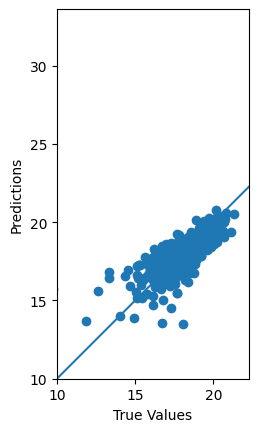

In [32]:
helper.test_data_set(data)


In [33]:
data.head()


,vote_count,vote_average,revenue,release,popularity,financial_investment,Post Production,Released,original_language_encoded,countries_of_production_encoded,keywords_encoded
0,11800.0,7.2,2.787965e+09,3631.0,150.437577,237000000.0,0.0,1.0,6.0,222.0,145.0
1,4500.0,6.9,9.610000e+08,2695.0,139.082615,300000000.0,0.0,1.0,6.0,260.0,377.0
2,4466.0,6.3,8.806746e+08,5777.0,107.376788,245000000.0,0.0,1.0,6.0,222.0,1520.0
3,9106.0,7.6,1.084939e+09,4580.0,112.312950,250000000.0,0.0,1.0,6.0,260.0,1632.0
4,2124.0,6.1,2.841391e+08,4449.0,43.926995,260000000.0,0.0,1.0,6.0,260.0,101.0


RMSE for 30 estimators: 1.120923605456547


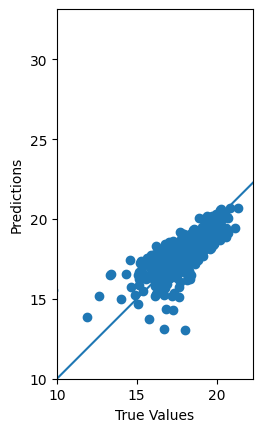

In [34]:
data = data.drop(columns =[ 'countries_of_production_encoded','original_language_encoded','keywords_encoded'])
data.to_csv('../input/preprocessed_data.csv')

helper.test_data_set(data)